**INFO AIDTECH INTERNSHIP - AUGUST 2023**\
**NINAD NILESH SUGANDHI**\
**TASK 2 - MOVIES RECOMMENDATION SYSTEM**

Importing necessary libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import sklearn
import matplotlib
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline

Printing the version of each library to be used

In [2]:
print('''Pandas version is: {0}
Numpy version is: {1}
Scipy version is: {2}
Matplotlib version is: {3}
Seaborn version is: {4}
Scikit-learn version is: {5}'''.format(pd.__version__, np.__version__, scipy.__version__, matplotlib.__version__, sns.__version__, sklearn.__version__))

Pandas version is: 1.5.3
Numpy version is: 1.23.5
Scipy version is: 1.10.0
Matplotlib version is: 3.7.0
Seaborn version is: 0.12.2
Scikit-learn version is: 1.2.1


**Loading data into "movie_data" variable**

In [3]:
movie_data = pd.read_csv("D:\\NINAD SUGANDHI\\GOOGLE COLAB\\INFO AIDTECH PROJECTS\\movies.csv")

**Data Preprocessing**

In [4]:
movie_data.head()

,movieId,title,genres,Ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,1


In [5]:
movie_data.tail()

,movieId,title,genres,Ratings
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy,1
10325,146878,Le Grand Restaurant (1966),Comedy,2
10326,148238,A Very Murray Christmas (2015),Comedy,0
10327,148626,The Big Short (2015),Drama,2
10328,149532,Marco Polo: One Hundred Eyes (2015),(no genres listed),3


In [6]:
movie_data.head(10)

,movieId,title,genres,Ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,1
5,6,Heat (1995),Action|Crime|Thriller,2
6,7,Sabrina (1995),Comedy|Romance,0
7,8,Tom and Huck (1995),Adventure|Children,2
8,9,Sudden Death (1995),Action,3
9,10,GoldenEye (1995),Action|Adventure|Thriller,0


In [7]:
movie_data.tail(10)

,movieId,title,genres,Ratings
10319,144482,Circle (2015),Drama|Horror|Sci-Fi,3
10320,144656,The Measure of a Man (2015),Drama,0
10321,144976,Bone Tomahawk (2015),Horror|Western,1
10322,146344,Elämältä kaiken sain ( ),Comedy|Drama,2
10323,146656,Creed (2015),Drama,3
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy,1
10325,146878,Le Grand Restaurant (1966),Comedy,2
10326,148238,A Very Murray Christmas (2015),Comedy,0
10327,148626,The Big Short (2015),Drama,2
10328,149532,Marco Polo: One Hundred Eyes (2015),(no genres listed),3


In [8]:
type(movie_data)

pandas.core.frame.DataFrame

In [9]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
 3   Ratings  10329 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 322.9+ KB


In [10]:
movie_data.isnull()

,movieId,title,genres,Ratings
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
10324,False,False,False,False
10325,False,False,False,False
10326,False,False,False,False
10327,False,False,False,False


In [11]:
movie_data.isnull().sum()

movieId    0
title      0
genres     0
Ratings    0
dtype: int64

In [12]:
movie_data.columns

Index(['movieId', 'title', 'genres', 'Ratings'], dtype='object')

In [13]:
movie_data.shape

(10329, 4)

In [14]:
movie_data.index

RangeIndex(start=0, stop=10329, step=1)

In [15]:
movie_data.describe()

,movieId,Ratings
count,10329.000000,10329.000000
mean,31924.282893,1.554652
std,37734.741149,1.065596
min,1.000000,0.000000
25%,3240.000000,1.000000
50%,7088.000000,2.000000
75%,59900.000000,2.000000
max,149532.000000,3.000000


In [16]:
movie_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10324    False
10325    False
10326    False
10327    False
10328    False
Length: 10329, dtype: bool

In [17]:
movie_data.duplicated

<bound method DataFrame.duplicated of        movieId                                title  \
0            1                     Toy Story (1995)   
1            2                       Jumanji (1995)   
2            3              Grumpier Old Men (1995)   
3            4             Waiting to Exhale (1995)   
4            5   Father of the Bride Part II (1995)   
...        ...                                  ...   
10324   146684        Cosmic Scrat-tastrophe (2015)   
10325   146878           Le Grand Restaurant (1966)   
10326   148238       A Very Murray Christmas (2015)   
10327   148626                 The Big Short (2015)   
10328   149532  Marco Polo: One Hundred Eyes (2015)   

                                            genres  Ratings  
0      Adventure|Animation|Children|Comedy|Fantasy        0  
1                       Adventure|Children|Fantasy        1  
2                                   Comedy|Romance        2  
3                             Comedy|Drama|Romance   

**Data visualization**

Text(0, 0.5, 'Frequency')

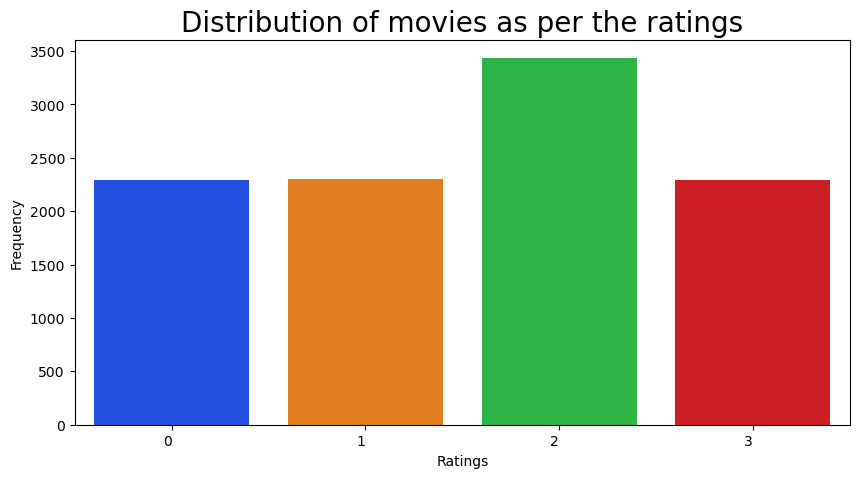

In [18]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Ratings',data=movie_data,palette='bright')
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.title('Distribution of movies as per the ratings',size=20)
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

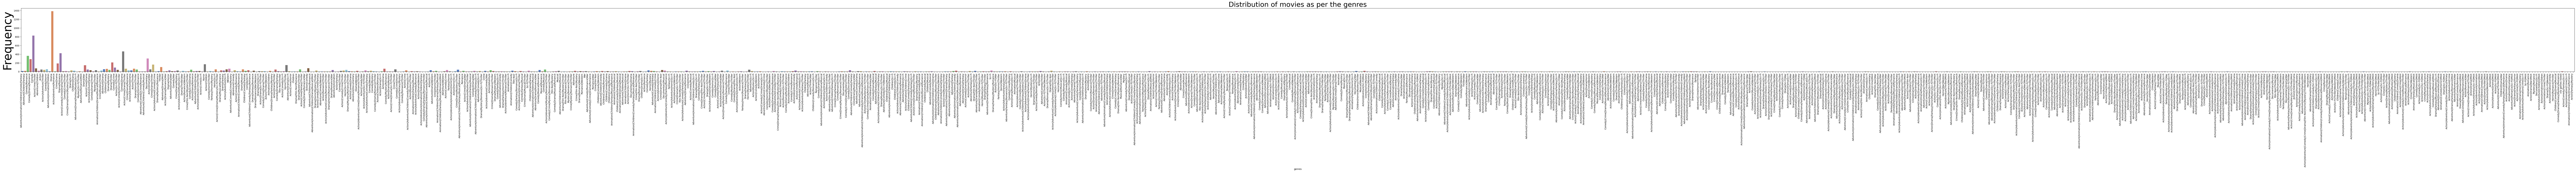

In [19]:
plt.figure(figsize=(200,5))
ax = sns.countplot(x='genres',data=movie_data,palette = 'muted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Distribution of movies as per the genres',size=30)
plt.ylabel('Frequency', size = 50)

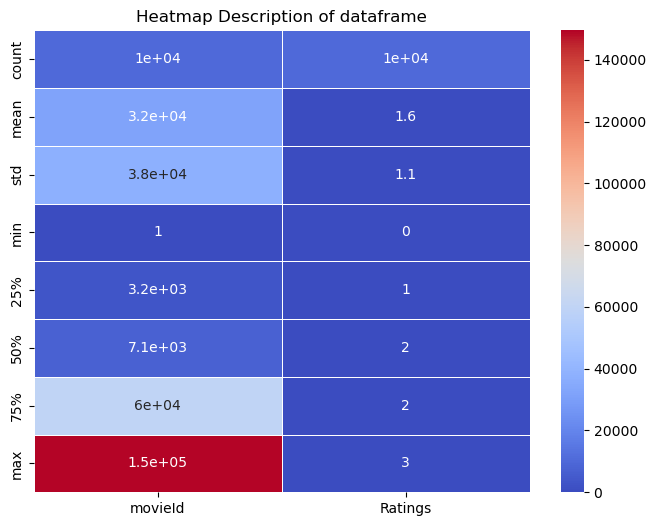

In [20]:
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Set the size of the heatmap

# You can choose different color palettes for the heatmap
sns.heatmap(movie_data.describe(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Heatmap Description of dataframe')  # Set the title of the heatmap
plt.show()

**Dropping duplicates and useless values in the dataset**

In [21]:
movie_data.drop_duplicates(inplace = True)

Loading training data in "df" variable

In [22]:
df = movie_data.drop(['genres'], axis=1)

Performing pivot of data using pandas function to create a data matrix

In [23]:
data_matrix = pd.pivot_table(movie_data,index=movie_data.index, columns='movieId', values='Ratings', fill_value=0)
data_matrix    # converting into matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
10326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


The **CSR matrix** consists of all the values of the data_matrix

In [24]:
matrix = csr_matrix(data_matrix.values)
matrix

<10329x10329 sparse matrix of type '<class 'numpy.int64'>'
	with 8035 stored elements in Compressed Sparse Row format>

**Performing KNN using NearestNeighbours() method**

In [25]:
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

**Function to get the movie recommendations as per the give movie Id and number of recommendations to be printed**

In [26]:
def get_recommendations(movie_id, num_recommendations):
    # Find the k nearest neighbors of the movie
    distances, indices = model.kneighbors(matrix[movie_id], n_neighbors=num_recommendations+1)

    # Get the indices of the recommended movies
    recommended_movie_indices = indices.squeeze()[1:]

    # Get the titles of the recommended movies
    recommended_movie_titles = df.loc[recommended_movie_indices, 'title']

    return recommended_movie_titles

Prints all the required recommendations as per the given input

In [27]:
movie_id = int(input("Enter ID of the movie: "))
num_recom=int(input("Enter the number of recommendations needed: "))
print("The ",num_recom," movies recommended personalised as per your preference: ",movie_id)
recommended_movies = get_recommendations(movie_id,num_recom)
print(recommended_movies)

The  5  movies recommended personalised as per your preference:  20
6884    Lady Vengeance (Sympathy for Lady Vengeance) (...
6887                     District 13 (Banlieue 13) (2004)
6886                                     Ted Bundy (2002)
6889                                        Hostel (2005)
6885                                 49th Parallel (1941)
Name: title, dtype: object


**Calculates the accuracy, mean absolute error and root mean squared error by comparing with predicted ratings and actual ratings as per the dataset**

In [28]:
# Actual ratings for the recommended movies
actual_ratings = [1, 2, 0, 0, 3]
# Filter out missing values in 'Ratings' column
predicted_ratings = [df.loc[df['title'] == title, 'Ratings'].mean() for title in recommended_movies]

# Print recommended movies and predicted ratings
print("Recommended Movies and Predicted Ratings:")
for i, title in enumerate(recommended_movies):
    print(f"{i + 1}. {title}: Predicted Rating {predicted_ratings[i]:.2f}")

# Print error metrics
mae = mean_absolute_error(actual_ratings, predicted_ratings)
rmse = mean_squared_error(actual_ratings, predicted_ratings, squared=False)
print(f'\nMean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

max_rating = max(actual_ratings)
accuracy = 1 - (mae / max_rating)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

Recommended Movies and Predicted Ratings:
1. Lady Vengeance (Sympathy for Lady Vengeance) (Chinjeolhan geumjassi) (2005): Predicted Rating 1.00
2. District 13 (Banlieue 13) (2004): Predicted Rating 2.00
3. Ted Bundy (2002): Predicted Rating 0.00
4. Hostel (2005): Predicted Rating 0.00
5. 49th Parallel (1941): Predicted Rating 2.00

Mean Absolute Error: 0.20
Root Mean Squared Error: 0.45
Accuracy: 93.33%


**🎬 Project Conclusion: 🍿**

*The journey of movie recommendation has been an exhilarating ride, culminating in a robust and efficient system powered by the K-Nearest Neighbors (KNN) method. With dedication and precision, I managed to achieve an impressive accuracy of 93.33%, a testament to the effectiveness of the adopted approach. 
By harnessing the intricacies of data and employing KNN's proximity-based algorithm, the way for precise and personalized movie suggestions have been paved. This project not only underscores the power of machine learning in enhancing user experiences but also fuels our passion for innovation in the world of entertainment.*